# Random Forest

A Random Forest is an ensemble learning technique in machine learning that is widely used for both classification and regression tasks. 

It's based on the concept of creating a "forest" of decision trees and then combining their predictions to make more accurate and robust predictions than a single decision tree alone. 

Random Forest is designed to address some of the limitations and challenges of individual decision trees.

### Random Forest Regression

Random Forest Regression is a specific application of the Random Forest algorithm for solving regression problems. 

Instead of predicting categorical classes, as in classification tasks, Random Forest Regression predicts continuous numerical values. It's used when the target variable you're trying to predict is a numeric quantity.

### EDA on Position_Salaries Dataset

In [1]:
# Import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset

df = pd.read_csv("Position_Salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
# Check the dimensions of dataset

df.shape

(10, 3)

In [4]:
# Check data types of each column

df.dtypes

Position    object
Level        int64
Salary       int64
dtype: object

In [5]:
# Check for missing values

df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [6]:
# Check for duplicate values

df.duplicated().sum()

0

In [7]:
# Calculate summary statistics

df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [8]:
df.describe(include= 'O')

,Position
count,10
unique,10
top,Business Analyst
freq,1


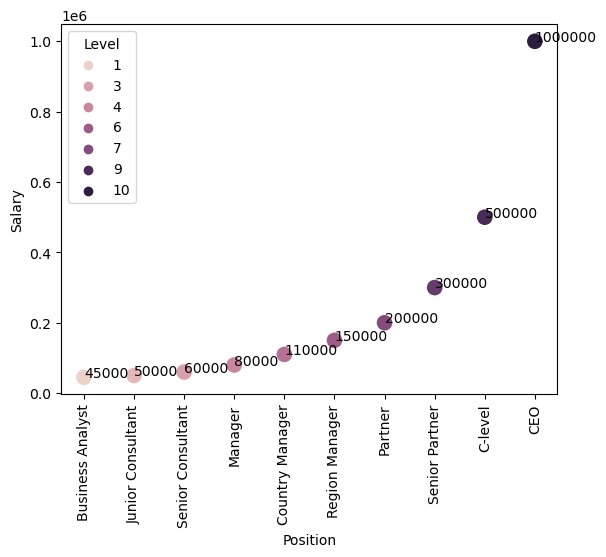

In [9]:
# Visualizing the relationship between the variables using scatter plot

sns.scatterplot(data=df, x="Position", y="Salary", hue="Level", s= 150)
plt.xticks(rotation=90)
for i in range(len(df)):
    plt.text(df['Position'][i], df['Salary'][i], df['Salary'][i])
plt.show()

### Building the Random Forest Regression Model

In [10]:
# Extract features and target

X = df[["Level"]]  # Features
y = df["Salary"]    # Target

In [11]:
# Importing the necessary libraries to build a model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [12]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Initialize the RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators

In [14]:
# Train the model on the training data

rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Predict salaries using the trained decision tree - Model Prediction

y_pred = rf_reg.predict(X_test)
print(y_pred)

[465000.  52700.]


In [16]:
# Comparing the results

comparision = pd.DataFrame()
comparision['Actual'] = y_test
comparision['predicted'] = y_pred
comparision

,Actual,predicted
8,500000,465000.0
1,50000,52700.0


In [17]:
# Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error = ", mse)
print("R-squared = ", r2)

Mean Squared Error =  616145000.0
R-squared =  0.9878292345679013


An R-squared (R2) value of approximately 0.988 for a Random Forest Regression model indicates that the model is able to explain about 98.8% of the variance in the target variable ("Salary") using the features ("Level") that were used to train the model.

In other words, the model's predictions are very close to the actual target values, and it's able to capture a high percentage of the underlying variability in the data. An R2 score of 0.988 is considered quite high and suggests that your Random Forest Regression model is performing very well on the given dataset.

But it's still important to consider other factors like the complexity of the model and the potential for overfitting.

In [18]:
# Predicting with new data

new_level = 100
predicted_salary = rf_reg.predict([[new_level]])

print("Predicted Salary for New_Level of {} is: {:.2f}" .format(new_level, predicted_salary[0]))

new_level = 50
predicted_salary = rf_reg.predict([[new_level]])

print("Predicted Salary for New_Level of {} is: {:.2f}" .format(new_level, predicted_salary[0]))

Predicted Salary for New_Level of 100 is: 759000.00
Predicted Salary for New_Level of 50 is: 759000.00


In [19]:
new_level = 11
for i in range(10):
    predicted_salary = rf_reg.predict([[new_level]])
    print("Predicted Salary for New_Level of {} is: {:.2f}" .format(new_level, predicted_salary[0]))
    new_level += 1

Predicted Salary for New_Level of 11 is: 759000.00
Predicted Salary for New_Level of 12 is: 759000.00
Predicted Salary for New_Level of 13 is: 759000.00
Predicted Salary for New_Level of 14 is: 759000.00
Predicted Salary for New_Level of 15 is: 759000.00
Predicted Salary for New_Level of 16 is: 759000.00
Predicted Salary for New_Level of 17 is: 759000.00
Predicted Salary for New_Level of 18 is: 759000.00
Predicted Salary for New_Level of 19 is: 759000.00
Predicted Salary for New_Level of 20 is: 759000.00


The output indicates that for a range of increasing levels (from 11 to 20), the Random Forest Regression model is predicting the same salary value of 7,59,000.00

This kind of behavior can indicate a potential issue with the model. It's possible that the model is not capturing complexity of the relationship between "Feature" (Level) and the "Target" (Salary) adequately. 

This could be due to a few reasons:
- Insufficient Data
- Overfitting
- Irrelevant Features